# AgML Detector

The `agml.models.Detector` module is a sub-module of the `agml.models` module that is designed for quick and efficient object detection in an easy-to-use interface. If you want more customized control over your models, check out `agml.models.DetectionModel` instead. However, if you're just looking to quickly train a model and use it to run inference, the `agml.models.Detector` is right for you.

THe `agml.models.Detector` wraps a YOLO11 model from [Ultralytics](https://github.com/ultralytics/ultralytics), and lets the underlying package abstract away most of the actual training/inference details, letting you focus on easy use of the API.

In [1]:
!pip install -q agml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 382.7/382.7 kB 7.5 MB/s eta 0:00:00


In [2]:
!pip install -q pytorch-lightning ensemble-boxes effdet==0.2.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.6/890.6 kB 20.6 MB/s eta 0:00:00


In [3]:
!pip install -q ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 877.6/877.6 kB 15.7 MB/s eta 0:00:00


In [4]:
import agml
import agml.models

from PIL import Image
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.20 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/usr/local/lib/python3.10/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## Training

Training a YOLO11 object detector with AgML is incredibly simple. All you need to do is choose the dataset and model architecture that you want, and then call the `Detector.train()` method. The best augmentations and optimal training parameters are automatically selected by the YOLO11 package, and then a saved model is stored directly in the AgML model repository.

**Note**: Make sure you define a data split! The YOLO model needs training, validation, and test data in order to successfully converge.

In [5]:
loader = agml.data.AgMLDataLoader('fruit_detection_worldwide')
loader.split(train=0.8, val=0.1, test=0.1)
agml.models.Detector.train(loader, 'yolo11s', epochs=50, run_name='fruit_test')

[AgML Download]: Extracting files for fruit_detection_worldwide... Done!

You have just downloaded fruit_detection_worldwide.

This dataset has no license.

When using this dataset, please cite the following:

@Article{s16081222,
  AUTHOR = {Sa, Inkyu and Ge, Zongyuan and Dayoub, Feras and Upcroft, Ben and Perez, Tristan and McCool, Chris},
  TITLE = {DeepFruits: A Fruit Detection System Using Deep Neural Networks},
  JOURNAL = {Sensors},
  VOLUME = {16},
  YEAR = {2016},
  NUMBER = {8},
  ARTICLE-NUMBER = {1222},
  URL = {https://www.mdpi.com/1424-8220/16/8/1222},
  ISSN = {1424-8220},
  ABSTRACT = {This paper presents a novel approach to fruit detection using deep convolutional neural networks. The aim is to build an accurate, fast and reliable fruit detection system, which is a vital element of an autonomous agricultural robotic platform; it is a key element for fruit yield estimation and automated harvesting. Recent work in deep neural networks has led to the development of a state

    Dataset successfully exported to YOLO format. 

    You can find the dataset at the following location: /usr/local/lib/python3.10/dist-packages/ultralytics/datasets/fruit_detection_worldwide
    The dataset metadata is stored at /usr/local/lib/python3.10/dist-packages/ultralytics/data/dataset.yaml
    


100%|██████████| 18.4M/18.4M [00:00<00:00, 147MB/s] 


Ultralytics 8.3.23 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/usr/local/lib/python3.10/dist-packages/ultralytics/data/dataset.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, s

100%|██████████| 755k/755k [00:00<00:00, 21.5MB/s]


Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  1    346112  ultralytics.nn.modules.block.C3k2            [256, 256, 1, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 50.5MB/s]


AMP: checks passed ✅


train: Scanning /usr/local/lib/python3.10/dist-packages/ultralytics/datasets/fruit_detection_worldwide/labels... 453 images, 0 backgrounds, 0 corrupt: 100%|██████████| 453/453 [00:00<00:00, 487.43it/s]


train: New cache created: /usr/local/lib/python3.10/dist-packages/ultralytics/datasets/fruit_detection_worldwide/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /usr/local/lib/python3.10/dist-packages/ultralytics/datasets/fruit_detection_worldwide/labels... 56 images, 0 backgrounds, 0 corrupt: 100%|██████████| 56/56 [00:00<00:00, 356.18it/s]

val: New cache created: /usr/local/lib/python3.10/dist-packages/ultralytics/datasets/fruit_detection_worldwide/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.49G      2.025      2.955      1.829         42        640: 100%|██████████| 29/29 [00:21<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.29s/it]

                   all         56        323      0.381      0.291      0.264      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.41G      1.611      1.901      1.497         89        640: 100%|██████████| 29/29 [00:17<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.41it/s]

                   all         56        323        0.5      0.274      0.314      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.44G       1.53       1.62      1.394         95        640: 100%|██████████| 29/29 [00:15<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]

                   all         56        323      0.507      0.457      0.411      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.46G      1.499       1.55      1.383         37        640: 100%|██████████| 29/29 [00:16<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.84it/s]

                   all         56        323      0.617      0.442      0.456      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.38G      1.479      1.473       1.35         35        640: 100%|██████████| 29/29 [00:16<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]

                   all         56        323      0.396      0.443      0.388      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.44G      1.432      1.409       1.36         58        640: 100%|██████████| 29/29 [00:16<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]

                   all         56        323      0.648      0.448      0.522       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.44G      1.417      1.358        1.3         57        640: 100%|██████████| 29/29 [00:16<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         56        323      0.618      0.577      0.586      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.43G      1.408      1.337      1.316         62        640: 100%|██████████| 29/29 [00:16<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         56        323      0.518      0.517      0.486      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.41G       1.37      1.317      1.315         45        640: 100%|██████████| 29/29 [00:16<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         56        323      0.468      0.611      0.576      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.44G      1.373      1.259      1.285         37        640: 100%|██████████| 29/29 [00:16<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all         56        323      0.579      0.553      0.573      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.42G      1.376      1.242       1.27         39        640: 100%|██████████| 29/29 [00:15<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.44it/s]

                   all         56        323       0.65      0.447      0.506      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.44G      1.327      1.203      1.265         32        640: 100%|██████████| 29/29 [00:16<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.74it/s]

                   all         56        323      0.573      0.656      0.604      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.39G      1.328      1.215      1.257         32        640: 100%|██████████| 29/29 [00:17<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         56        323      0.636      0.677       0.67      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.46G      1.296       1.11      1.252         46        640: 100%|██████████| 29/29 [00:18<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.67it/s]

                   all         56        323      0.581      0.581      0.583      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.46G      1.285      1.078      1.227         45        640: 100%|██████████| 29/29 [00:17<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]

                   all         56        323      0.701      0.671      0.704      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.46G       1.27      1.104       1.22         35        640: 100%|██████████| 29/29 [00:16<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.15it/s]

                   all         56        323      0.674      0.541      0.628      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.38G      1.314      1.122      1.234         60        640: 100%|██████████| 29/29 [00:16<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]

                   all         56        323      0.593      0.578      0.594       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.46G      1.246      1.053      1.218         71        640: 100%|██████████| 29/29 [00:16<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         56        323       0.68      0.681      0.739      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.46G      1.239      1.026      1.207         83        640: 100%|██████████| 29/29 [00:15<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         56        323      0.657      0.664      0.712      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.42G      1.252     0.9774      1.189         54        640: 100%|██████████| 29/29 [00:15<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.36it/s]

                   all         56        323      0.701      0.673      0.723      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.42G      1.214     0.9525      1.174         58        640: 100%|██████████| 29/29 [00:15<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.36it/s]

                   all         56        323      0.735      0.657      0.726      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.41G        1.2     0.9505      1.178         60        640: 100%|██████████| 29/29 [00:16<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         56        323      0.702      0.637      0.705      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.44G      1.189     0.9472      1.186         34        640: 100%|██████████| 29/29 [00:17<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.15it/s]

                   all         56        323      0.753      0.689      0.757      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.41G      1.184     0.9425      1.171         57        640: 100%|██████████| 29/29 [00:17<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.21it/s]

                   all         56        323       0.81       0.67      0.758      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.35G      1.154     0.8815       1.16         71        640: 100%|██████████| 29/29 [00:17<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.52it/s]

                   all         56        323      0.691       0.69      0.737      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.45G      1.172      0.892       1.17         39        640: 100%|██████████| 29/29 [00:17<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.28it/s]

                   all         56        323      0.707      0.677      0.759      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.46G      1.154     0.8552      1.161         38        640: 100%|██████████| 29/29 [00:17<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.16it/s]

                   all         56        323      0.726      0.713      0.788      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.41G      1.141     0.8557      1.153         35        640: 100%|██████████| 29/29 [00:15<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.71it/s]

                   all         56        323      0.723      0.765      0.799      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.37G      1.131     0.8527      1.141         64        640: 100%|██████████| 29/29 [00:15<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.46it/s]

                   all         56        323      0.782      0.726      0.796      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.42G      1.121     0.8314      1.122         35        640: 100%|██████████| 29/29 [00:14<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.33it/s]

                   all         56        323       0.79      0.674      0.763      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.44G      1.127     0.7884      1.133         54        640: 100%|██████████| 29/29 [00:15<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         56        323      0.743      0.676      0.738      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.46G      1.074     0.7499      1.101         36        640: 100%|██████████| 29/29 [00:17<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         56        323      0.662      0.731      0.725      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.39G      1.081     0.7667      1.121         41        640: 100%|██████████| 29/29 [00:16<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         56        323      0.781       0.76      0.806      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.46G      1.058     0.7319      1.115         44        640: 100%|██████████| 29/29 [00:16<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

                   all         56        323      0.732      0.704      0.767      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.41G      1.086     0.7611      1.108         51        640: 100%|██████████| 29/29 [00:16<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]

                   all         56        323      0.759      0.703      0.751      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50       4.4G      1.048     0.7387      1.102         53        640: 100%|██████████| 29/29 [00:16<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.26it/s]

                   all         56        323      0.778      0.662      0.757      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.39G      1.067     0.7336      1.105         51        640: 100%|██████████| 29/29 [00:16<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.52it/s]

                   all         56        323      0.827      0.763      0.835        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.41G      1.049     0.7282      1.104         38        640: 100%|██████████| 29/29 [00:16<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.80it/s]

                   all         56        323      0.771      0.809      0.846      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.46G      1.023     0.6731      1.074         62        640: 100%|██████████| 29/29 [00:16<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         56        323      0.782      0.785      0.822       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.41G      1.008     0.6794      1.091         41        640: 100%|██████████| 29/29 [00:16<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all         56        323       0.77      0.752      0.813      0.515


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.38G     0.9742     0.6427      1.074         28        640: 100%|██████████| 29/29 [00:20<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.16it/s]

                   all         56        323      0.815      0.704      0.786      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.41G     0.9406     0.5991      1.056         29        640: 100%|██████████| 29/29 [00:16<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         56        323       0.75      0.723      0.775      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.43G     0.9236     0.5617      1.054         26        640: 100%|██████████| 29/29 [00:16<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         56        323      0.771      0.768      0.799      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.42G     0.9307      0.546      1.046         41        640: 100%|██████████| 29/29 [00:16<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]

                   all         56        323      0.779       0.77      0.802      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.41G     0.9276     0.5584      1.063         20        640: 100%|██████████| 29/29 [00:16<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]

                   all         56        323      0.748      0.779       0.79      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.42G     0.8934     0.5168      1.029         25        640: 100%|██████████| 29/29 [00:15<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]

                   all         56        323      0.829       0.73      0.815      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.42G     0.8831     0.5218      1.025         25        640: 100%|██████████| 29/29 [00:16<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]

                   all         56        323      0.784      0.774      0.825      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.44G     0.8758     0.5143      1.032         24        640: 100%|██████████| 29/29 [00:17<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.17it/s]

                   all         56        323      0.795       0.78      0.826      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.38G     0.8788     0.4938      1.034         21        640: 100%|██████████| 29/29 [00:15<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]

                   all         56        323      0.785      0.776      0.821       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.41G     0.8503     0.5063      1.017         45        640: 100%|██████████| 29/29 [00:14<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.46it/s]

                   all         56        323      0.795      0.765      0.827       0.52



50 epochs completed in 0.280 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 19.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 19.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.23 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,415,509 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]


                   all         56        323      0.797      0.779      0.826      0.525
               avocado          7         41       0.72       0.78      0.767      0.465
             rockmelon          6         13      0.907       0.75      0.896       0.51
                 apple          6         38      0.723      0.895      0.894      0.637
                orange          7         24      0.746      0.611      0.711      0.415
            strawberry          3         50      0.835      0.812      0.849      0.576
                 mango         14         91      0.859      0.934      0.956      0.678
              capsicum         13         66      0.787      0.671      0.708      0.393
Speed: 0.2ms preprocess, 5.8ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/train



        For full Ultralytics training logs and outputs, see: runs/detect/train

        To load the AgML model directly, you can run: 

        import agml.models
        model = agml.models.Detector('fruit_test')

        and the model with the best weights from this training run will be loaded.
        


'fruit_test'

## Inference

You can run inference simply with `agml.models.Detector.load()`, to load the name of your saved model. and then either `Detector.show_prediction()` for visualization, or `Detector.predict()` to get the bounding boxes, labels, and confidence values.

In [6]:
model = agml.models.Detector.load('fruit_test')

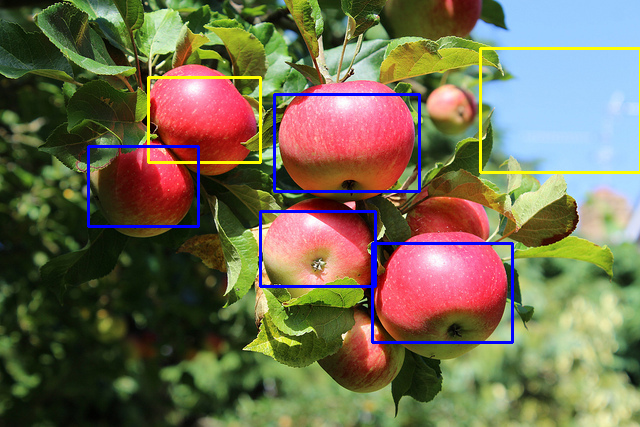

In [7]:

Image.fromarray(model.show_prediction(loader[1][0]))

## Integration with Annotation Tools

If you're using the CVAT annotation tool, you can export annotations to the `COCO 1.0` format, then use `agml.data.extensions.restructure_cvat_annotations("image_folder", "annotation_folder", "dataset_name")` to set up the annotations in a format ready to use in AgML.